<a href="https://colab.research.google.com/github/gmazzitelli/studenti/blob/master/make_blobs_asymetric.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

(1.6194154820868991, 2.318942322779343, -0.34437337409431396)
[ 5.93733448 15.16703435  8.06343825]
[ 4.11273461 18.79356051  8.06343825]


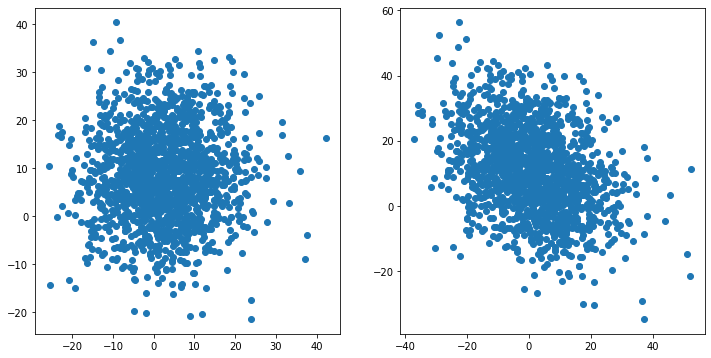

In [129]:
def confidence_ellipse_par(x, y):
    import numpy as np
    if x.size != y.size:
        raise ValueError("x and y must be the same size")

    cov = np.cov(x, y)

    if np.sqrt(cov[0, 0] * cov[1, 1]) == 0:
        width = height = -1
        pearson = np.nan
    else:
        pearson = cov[0, 1]/np.sqrt(cov[0, 0] * cov[1, 1])
        # Using a special case to obtain the eigenvalues of this
        # two-dimensionl dataset.

        ell_radius_x = np.sqrt(1 + pearson)
        ell_radius_y = np.sqrt(1 - pearson)
        width=ell_radius_x * 2
        height=ell_radius_y * 2
    return width, height, pearson


import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

plt.figure(figsize=(12, 6))

n_samples = 1500
random_state = 170
X, y = make_blobs(n_samples=n_samples, centers=1, random_state=random_state, cluster_std =10, center_box=(0, 40), n_features=3)


plt.subplot(121)
plt.scatter(X[:, 0], X[:, 1])

# transformation = [[0.60834549, -0.63667341], [-0.40887718, 0.85253229]]
# X_aniso = np.dot(X[:,[0,1]], transformation)
d = np.random.uniform(low=-0.3, high=.3, size=1)
# transformation = [[1.-d, -d, 0 ], [d, 1.-d, 0], [0, 0, 1]] rotazine piccola
# transformation = [[np.cos(d), -np.sin(d), 0 ], [np.sin(d), np.cos(d), 0], [0, 0, 1]] # rotazione corretta 
transformation = [[1/(1-d), -d, 0 ], [-d, 1/(1-d), 0], [0, 0, 1]]
X_aniso = np.dot(X, transformation)
print (confidence_ellipse_par(X_aniso[:, 0], X_aniso[:, 1]))
print (X[5])
print (X_aniso[5])
plt.subplot(122)
plt.scatter(X_aniso[:, 0], X_aniso[:, 1])
plt.show()

In [0]:
X[:,[0,1]]

array([[ 4.57436676, 18.14813289],
       [-4.32288391, 18.26431594],
       [15.45560532,  4.82217641],
       ...,
       [10.1013653 , -6.68396644],
       [ 3.86681716, -4.55154029],
       [ 0.57029406,  5.66847107]])